In [1]:
import sys
import os
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from model import *
from data import *

In [2]:
covariance_types = ['full', 'tied', 'diag', 'tied_diag', 'spherical', 'tied_spherical']
n_components = 10
seeds = 10

In [3]:
acc_kmeans = []
for covariance_type in covariance_types:
    print("Training GMM K-Means with {} Covariance".format(covariance_type))
    test_acc = []
    for i in range(seeds):
        classifier = DigitClassifier()
        classifier.get_gmm_list(kmeans=True, covariance_type=covariance_type, n_components=n_components)
        test_acc.append(classifier.evaluate(True))

    acc_kmeans.append(np.array(test_acc))

    print("GMM K-Means, Covariance Type: {}, Mean Accuracy: {}".format(covariance_type, np.mean(acc_kmeans[-1])))

Training GMM K-Means with full Covariance
GMM K-Means, Covariance Type: full, Mean Accuracy: 0.8709090909090909
Training GMM K-Means with tied Covariance
GMM K-Means, Covariance Type: tied, Mean Accuracy: 0.8813636363636362
Training GMM K-Means with diag Covariance
GMM K-Means, Covariance Type: diag, Mean Accuracy: 0.8781818181818182
Training GMM K-Means with tied_diag Covariance
GMM K-Means, Covariance Type: tied_diag, Mean Accuracy: 0.8881818181818183
Training GMM K-Means with spherical Covariance
GMM K-Means, Covariance Type: spherical, Mean Accuracy: 0.8286363636363635
Training GMM K-Means with tied_spherical Covariance
GMM K-Means, Covariance Type: tied_spherical, Mean Accuracy: 0.835


In [4]:
acc_em = []
for covariance_type in covariance_types:
    test_acc = []
    for i in range(seeds):
        classifier = DigitClassifier()
        classifier.get_gmm_list(kmeans=False, covariance_type=covariance_type, n_components=n_components)
        test_acc.append(classifier.evaluate(True))

    acc_em.append(np.array(test_acc))

    print("GMM EM, Covariance Type: {}, Mean Accuracy: {}".format(covariance_type, np.mean(acc_em[-1])))

GMM EM, Covariance Type: full, Mean Accuracy: 0.8760909090909091
GMM EM, Covariance Type: tied, Mean Accuracy: 0.890590909090909
GMM EM, Covariance Type: diag, Mean Accuracy: 0.8914090909090907
GMM EM, Covariance Type: tied_diag, Mean Accuracy: 0.8933181818181817
GMM EM, Covariance Type: spherical, Mean Accuracy: 0.8270454545454546
GMM EM, Covariance Type: tied_spherical, Mean Accuracy: 0.7419090909090909


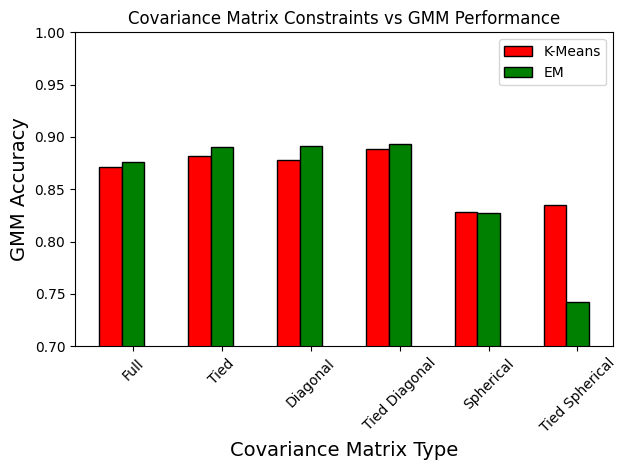

In [ ]:
barWidth = 0.25

br1 = np.arange(len(covariance_types)) 
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, np.mean(acc_kmeans, axis=1), color ='r', width = barWidth, 
        edgecolor ='black', label ='K-Means') 
plt.bar(br2, np.mean(acc_em, axis=1), color ='g', width = barWidth, 
        edgecolor ='black', label ='EM') 


# Adding Xticks 
plt.title("Covariance Matrix Constraints vs GMM Performance")
plt.xlabel('Covariance Matrix Type', fontsize = 14) 
plt.ylabel('GMM Accuracy', fontsize = 14) 
plt.xticks([r + barWidth for r in range(len(covariance_types))], 
        ['Full', 'Tied', 'Diagonal', 'Tied Diagonal', 'Spherical', 'Tied Spherical'], rotation=45)
plt.ylim([0.7, 1])

plt.legend()
plt.tight_layout()
plt.savefig('figures/covariance_type_no_gender.jpg')

In [ ]:
acc_em_use_gender = []
for covariance_type in covariance_types:
    test_acc_gender = []
    for i in range(seeds):
        classifier = DigitClassifier()
        classifier.get_gmm_list(kmeans=False, covariance_type=covariance_type, n_components=n_components, use_gender=True)
        test_acc_gender.append(classifier.evaluate(True))

    acc_em_use_gender.append(np.array(test_acc_gender))

    print("GMM EM with Gender, Covariance Type: {}, Mean Accuracy: {}".format(covariance_type, np.mean(acc_em_use_gender[-1])))
    

GMM EM with Gender, Covariance Type: full, Mean Accuracy: 0.8645454545454545
GMM EM with Gender, Covariance Type: tied, Mean Accuracy: 0.8877272727272727
GMM EM with Gender, Covariance Type: diag, Mean Accuracy: 0.8863636363636364
GMM EM with Gender, Covariance Type: tied_diag, Mean Accuracy: 0.8818181818181818
GMM EM with Gender, Covariance Type: spherical, Mean Accuracy: 0.860909090909091
GMM EM with Gender, Covariance Type: tied_spherical, Mean Accuracy: 0.7481818181818182


In [20]:
for i in range(len(covariance_types)):
    print("GMM EM with Gender, Covariance Type: {}, Mean Accuracy: {}".format(covariance_types[i], np.mean(acc_em_use_gender[i])))

GMM EM with Gender, Covariance Type: full, Mean Accuracy: 0.8678181818181818
GMM EM with Gender, Covariance Type: tied, Mean Accuracy: 0.8951818181818183
GMM EM with Gender, Covariance Type: diag, Mean Accuracy: 0.8864545454545455
GMM EM with Gender, Covariance Type: tied_diag, Mean Accuracy: 0.8896818181818184
GMM EM with Gender, Covariance Type: spherical, Mean Accuracy: 0.8467727272727273
GMM EM with Gender, Covariance Type: tied_spherical, Mean Accuracy: 0.7506818181818182


In [21]:
acc_kmeans_use_gender = []
for covariance_type in covariance_types:
    test_acc_gender = []
    for i in range(seeds):
        classifier = DigitClassifier()
        classifier.get_gmm_list(kmeans=True, covariance_type=covariance_type, n_components=n_components, use_gender=True)
        test_acc_gender.append(classifier.evaluate(True))

    acc_kmeans_use_gender.append(np.array(test_acc_gender))

    print("GMM K-Means with Gender, Covariance Type: {}, Mean Accuracy: {}".format(covariance_type, np.mean(acc_kmeans_use_gender[-1])))
    

GMM K-Means with Gender, Covariance Type: full, Mean Accuracy: 0.8845454545454545
GMM K-Means with Gender, Covariance Type: tied, Mean Accuracy: 0.8909090909090909
GMM K-Means with Gender, Covariance Type: diag, Mean Accuracy: 0.8818181818181818
GMM K-Means with Gender, Covariance Type: tied_diag, Mean Accuracy: 0.8831818181818182
GMM K-Means with Gender, Covariance Type: spherical, Mean Accuracy: 0.8563636363636362
GMM K-Means with Gender, Covariance Type: tied_spherical, Mean Accuracy: 0.8540909090909091


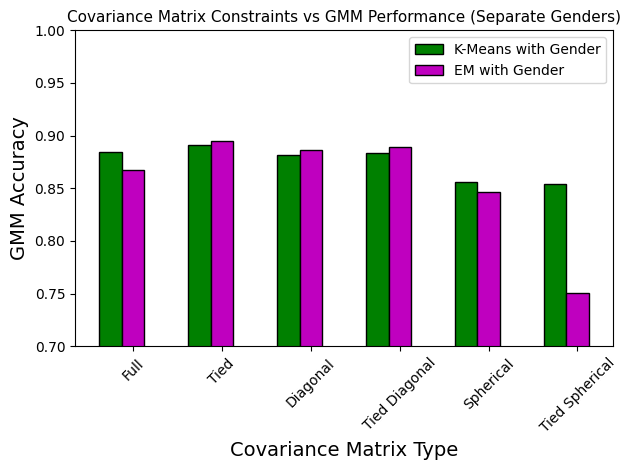

In [ ]:
barWidth = 0.25

br1 = np.arange(len(covariance_types)) 
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, np.mean(acc_kmeans_use_gender, axis=1), color ='g', width = barWidth, 
        edgecolor ='black', label ='K-Means with Gender') 
plt.bar(br2, np.mean(acc_em_use_gender, axis=1), color ='m', width = barWidth, 
        edgecolor ='black', label ='EM with Gender') 

# Adding Xticks 
plt.title("Covariance Matrix Constraints vs GMM Performance (Separate Genders)", fontsize=11)
plt.xlabel('Covariance Matrix Type', fontsize = 14) 
plt.ylabel('GMM Accuracy', fontsize = 14) 
plt.xticks([r + barWidth for r in range(len(covariance_types))], 
        ['Full', 'Tied', 'Diagonal', 'Tied Diagonal', 'Spherical', 'Tied Spherical'], rotation=45)
plt.ylim([0.7, 1])

plt.legend()
plt.tight_layout()
plt.savefig('figures/covariance_type_gender.jpg')

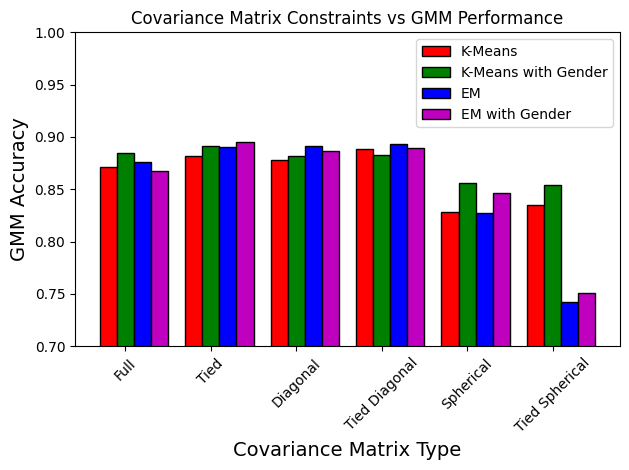

In [ ]:
barWidth = 0.2

br1 = np.arange(len(covariance_types)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 

# Make the plot
plt.bar(br1, np.mean(acc_kmeans, axis=1), color ='r', width = barWidth, 
        edgecolor ='black', label ='K-Means') 
plt.bar(br2, np.mean(acc_kmeans_use_gender, axis=1), color ='g', width = barWidth, 
        edgecolor ='black', label ='K-Means with Gender') 
plt.bar(br3, np.mean(acc_em, axis=1), color ='b', width = barWidth, 
        edgecolor ='black', label ='EM') 
plt.bar(br4, np.mean(acc_em_use_gender, axis=1), color ='m', width = barWidth, 
        edgecolor ='black', label ='EM with Gender') 

# Adding Xticks 
plt.title("Covariance Matrix Constraints vs GMM Performance")
plt.xlabel('Covariance Matrix Type', fontsize = 14) 
plt.ylabel('GMM Accuracy', fontsize = 14) 
plt.xticks([r + barWidth for r in range(len(covariance_types))], 
        ['Full', 'Tied', 'Diagonal', 'Tied Diagonal', 'Spherical', 'Tied Spherical'], rotation=45)
plt.ylim([0.7, 1])

plt.legend()
plt.tight_layout()
plt.savefig('figures/covariance_type_gender_comp.jpg')